[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/drive/folders/13fmR94tOrsB70hr4wBiZl2zINGspc57W?usp=sharing)


## Classification using Multilayer Perceptron ##

### Preparing libraries ###

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


### Import the Fashion MNIST dataset ###

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Explore the data ###

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### Preprocess the data ###

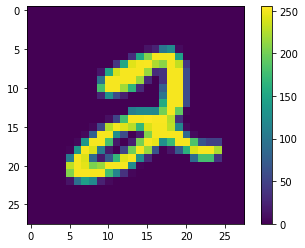

In [9]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

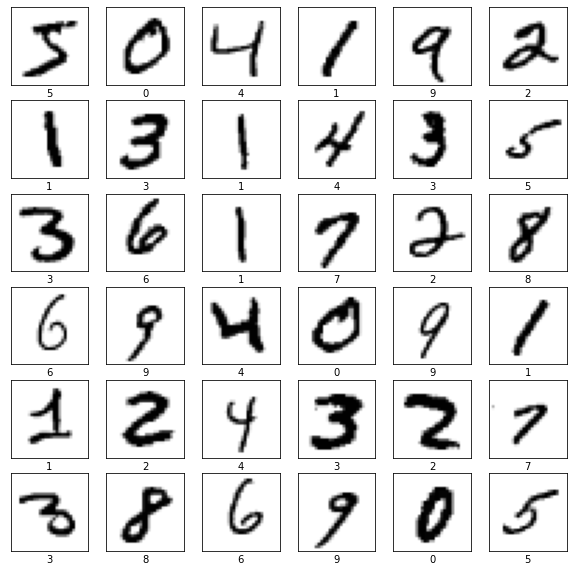

In [11]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the model ###

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 107,440
Trainable params: 107,440
Non-trainable params: 0
_________________________________________________________________


### Compile the model ###

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train the model ###

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2488 - accuracy: 0.9278
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9688
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0734 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0359 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0258 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0210 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.018

### Evaluate accuracy ###

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0962 - accuracy: 0.9773

Test accuracy: 0.9772999882698059


### Make predictions ###

In [17]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([2.3462599e-12, 2.9910037e-08, 6.9598316e-10, 1.7783480e-08,
       1.0771187e-10, 6.2300149e-13, 2.5417526e-14, 9.9999964e-01,
       1.0888965e-11, 4.0399661e-07], dtype=float32)

In [20]:
np.argmax(predictions[0])

7

In [21]:
test_labels[0]

7

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


### Verify predictions ###

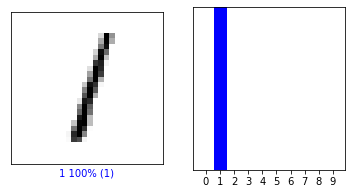

In [23]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

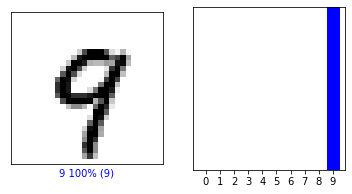

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


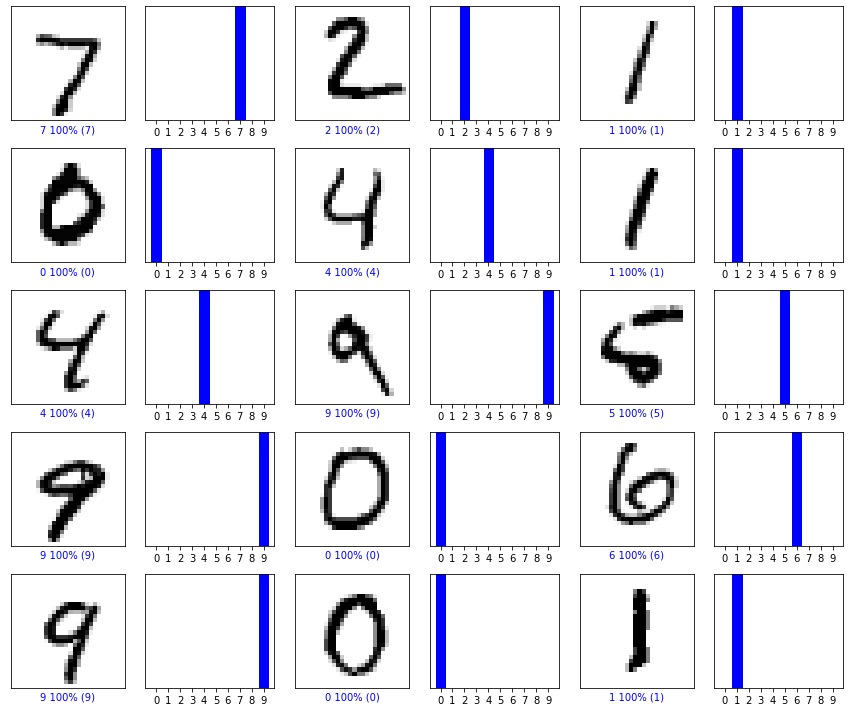

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Make predictions on single images ###

In [26]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


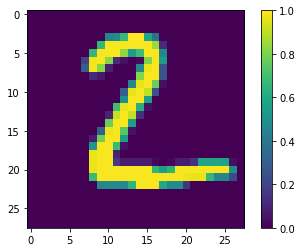

In [27]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.5543465e-12 1.8738913e-08 1.0000000e+00 4.5318488e-10 9.2510940e-17
  5.4123838e-16 7.8851942e-12 1.7024235e-19 2.5753671e-10 3.9524370e-15]]


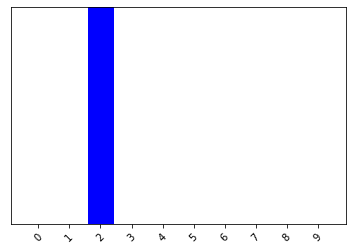

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
# valor predicho
class_names[np.argmax(predictions_single[0])]

'2'

In [32]:
# etiqueta real o manual de la dataset
class_names[test_labels[1]]

'2'